# Text Representation
This notebook demonstrates concepts in text representation and statistical models for text analysis. It includes examples of creating a Document Term Matrix (DTM), calculating word probabilities, and applying the Multinomial Model to predict text origins.

## Preparation
### Required Packages
First, install and import the required packages for text analysis.

### Document Term Matrix
The `Document Term Matrix` is a bag-of-words representation of text. It is a matrix where:

- Rows correspond to documents.
- Columns correspond to terms (unique words in the corpus).

For example:

$$
X = \begin{bmatrix}
1 & 1 & ... \\
0 & 2 & ... \\
... & ... & ...
\end{bmatrix}
$$
represents a document-term matrix.

In [1]:
# Install necessary packages
# !pip install nltk numpy pandas scikit-learn

# Import packages
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from math import factorial
from scipy.stats import multinomial


## Text Representation
### Creating a Sample Corpus

In [2]:
# Define sample texts
texts = [
    'John loves icecream',
    'John loves oranges',
    'Marry hates icecream'
]

# Check corpus size
corpus_size = len(texts)
print(f'Corpus size: {corpus_size}')

Corpus size: 3


In [3]:
def create_dtm(texts):

    if not texts or not all(isinstance(t, str) for t in texts):
        raise ValueError("Input must be a list of non-empty strings.")
    
    # Convert texts to lowercase
    texts = [text.lower() for text in texts]
    
    # Extract unique terms
    all_words = [word for text in texts for word in text.split()]
    unique_terms = sorted(set(all_words))  # Sorted for consistent column order
    
    # Create the matrix
    dtm = []
    for text in texts:
        row = [text.split().count(term) for term in unique_terms]
        dtm.append(row)
    
    return dtm, unique_terms

dtm, unique_terms = create_dtm(texts)

print("Document Term Matrix:")
for row in dtm:
    print(row)

print("\nUnique Terms (Columns):", unique_terms)


Document Term Matrix:
[0, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 0, 1]
[1, 1, 0, 0, 1, 0]

Unique Terms (Columns): ['hates', 'icecream', 'john', 'loves', 'marry', 'oranges']


### Document Term Matrix

In [4]:
# Create a Document Term Matrix using CountVectorizer
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(texts).toarray()

# Display the matrix and terms
print('Document Term Matrix:')
print(dtm)
print('Terms:', vectorizer.get_feature_names_out())

Document Term Matrix:
[[0 1 1 1 0 0]
 [0 0 1 1 0 1]
 [1 1 0 0 1 0]]
Terms: ['hates' 'icecream' 'john' 'loves' 'marry' 'oranges']


### Task 1
Create a `Document Term Matrix` for the following texts:

In [5]:
# Define new sample texts
new_texts = [
    'banana banana banana banana chocolate',
    'chocolate chocolate chocolate banana',
    'banana banana'
]

# Create a Document Term Matrix for new texts
new_dtm = vectorizer.fit_transform(new_texts).toarray()

print('Document Term Matrix for new texts:')
print(new_dtm)
print('Terms:', vectorizer.get_feature_names_out())

Document Term Matrix for new texts:
[[4 1]
 [1 3]
 [2 0]]
Terms: ['banana' 'chocolate']


## Multinomial Model of Texts
The Multinomial Model of Texts is a probabilistic model used to determine the likelihood of a document being generated by a given source based on word probabilities. It is based on the Multinomial Distribution:

$$
P_n(x_1, x_2, ..., x_n) = \frac{N!}{x_1! x_2! ... x_n!} p_1^{x_1} \times p_2^{x_2} \times ... \times p_n^{x_n}
$$

- $N$ is the total number of words in the document.
- $x_i$ is the count of the $i$th word.
- $p_i$ is the probability of the $i$th word.


### Generating Text Data

Next, we assume that texts 1 through 3 are generated by John, while texts 4 though 6 are generated by Mary. Text_7 and Text_8 are of unknown origin. And we must determine who said what!

Create a Document Term matrix and call it banana_data:

Next, we need to calculate John and Mary word rates (how often do they use certain words).

We do this by summing together all document rates that belong to John and to Mary, respectively.

In [6]:
# Define a larger corpus
banana_texts = [
    'banana banana banana banana chocolate',
    'banana banana',
    'chocolate chocolate chocolate banana fudge',
    'icecream icecream fudge icecream',
    'fudge fudge fudge',
    'icecream icecream fudge fudge',
    'icecream fudge fudge',
    'chocolate chocolate banana banana'
]

# Create a Document Term Matrix
banana_data = vectorizer.fit_transform(banana_texts).toarray()

print('Document Term Matrix:')
print(banana_data)
print('Terms:', vectorizer.get_feature_names_out())

Document Term Matrix:
[[4 1 0 0]
 [2 0 0 0]
 [1 3 1 0]
 [0 0 1 3]
 [0 0 3 0]
 [0 0 2 2]
 [0 0 2 1]
 [2 2 0 0]]
Terms: ['banana' 'chocolate' 'fudge' 'icecream']


In [9]:
banana_data

array([[4, 1, 0, 0],
       [2, 0, 0, 0],
       [1, 3, 1, 0],
       [0, 0, 1, 3],
       [0, 0, 3, 0],
       [0, 0, 2, 2],
       [0, 0, 2, 1],
       [2, 2, 0, 0]])

In [7]:
john_docs = banana_data[0:3, :]

john_docs

array([[4, 1, 0, 0],
       [2, 0, 0, 0],
       [1, 3, 1, 0]])

In [8]:
john_rates = john_docs.sum(axis=0)

john_rates

array([7, 4, 1, 0])

we want to calculate the relative rates (probabilities) of word use. We can do this by dividing the raw rates we have by the total number of words

In [9]:
total_john = john_rates.sum()
total_john

probs_john = john_rates / total_john
probs_john

array([0.58333333, 0.33333333, 0.08333333, 0.        ])

Now, do the same for Mary

In [10]:
# your code here
mary_docs = banana_data[3:6, :]

In [14]:
mary_docs

array([[0, 0, 1, 3],
       [0, 0, 3, 0],
       [0, 0, 2, 2]])

In [11]:
mary_rates = mary_docs.sum(axis=0)
mary_rates

array([0, 0, 6, 5])

In [12]:
total_mary = mary_rates.sum()
total_mary

np.int64(11)

In [17]:
probs_mary = mary_rates / total_mary
probs_mary

array([0.        , 0.        , 0.54545455, 0.45454545])

## Now we have our Language Models
Next, we need to determine the rates of the unknown texts! Remember, the texts are 7 and 8.

In [13]:
unknown_1 = banana_data[6, ]
unknown_2 = banana_data[7, ]

In [14]:
print(unknown_1)

print(unknown_2)

[0 0 2 1]
[2 2 0 0]


We can now start calculating!

First, let’s determine the probability of both of these texts belonging to John.

These are John’s probabilities:

In [15]:
probs_john

array([0.58333333, 0.33333333, 0.08333333, 0.        ])

### Example: Calculating Probabilities for Unknown Texts
For an unknown text with word counts $[b=0, c=0, f=2, i=1]$, and John's probabilities:

$$
P(b=0, c=0, f=2, i=1) = \frac{3!}{0! 0! 2! 1!} \cdot 0.58^0 \cdot 0.33^0 \cdot 0.08^2 \cdot 0^1
$$
Step-by-step:

1. Calculate the factorial term:

$$
\frac{3!}{0! 0! 2! 1!}
$$
2. Multiply by the word probabilities raised to their respective counts.

In [16]:
first_part = factorial(3) / (factorial(0) * factorial(0) * factorial(2) * factorial(1))

In [17]:
first_part

3.0

Now this: 

$$
0.58^0 \cdot 0.33^0 \cdot 0.08^2 \cdot 0^1
$$

In [18]:
second_part = 0.58**0 * 0.33**0 * 0.08**2 * 0**1

Combining together:

In [19]:
first_part * second_part

0.0

This is the probability of the first `unknown` text being generated by john.

Now, let's do the second `unknown` text:

$$
P(b=2, c=2, f=0, i=0) = \frac{4!}{2!2!0!0!}0.58^{2}\times 0.33^{2} \times 0.8^0 \times 0^0
$$

In [20]:
first_part = factorial(4) / (factorial(2) * factorial(2) * factorial(0) * factorial(0))

In [21]:
# Element-wise exponentiation and product
second_part = np.prod(probs_john ** unknown_2)

In [22]:
first_part * second_part

np.float64(0.22685185185185192)

# Now calculate Mary probabilities yourself

### Example: Calculating Probabilities Using Multinomial Model

In [23]:
# Assuming John generated texts 1-3 and Mary generated texts 4-6
john_docs = banana_data[:3, :]
mary_docs = banana_data[3:6, :]

# Calculate word probabilities for John and Mary
john_rates = john_docs.sum(axis=0)
mary_rates = mary_docs.sum(axis=0)

john_probs = john_rates / john_rates.sum()
mary_probs = mary_rates / mary_rates.sum()

print('John Probabilities:', john_probs)
print('Mary Probabilities:', mary_probs)


# Define unknown texts (rows 7 and 8)
unknown_1 = banana_data[6, :]
unknown_2 = banana_data[7, :]

# Display unknown texts
print('Unknown Text 1:', unknown_1)
print('Unknown Text 2:', unknown_2)

# Calculate probabilities
def multinomial_probability(word_counts, word_probs):
    N = sum(word_counts)
    numerator = factorial(N)
    denominator = np.prod([factorial(c) for c in word_counts])
    probs = np.prod(word_probs ** word_counts)
    return (numerator / denominator) * probs

# Example for Unknown Text 1
p_john_unknown_1 = multinomial_probability(unknown_1, john_probs)
p_john_unknown_2 = multinomial_probability(unknown_2, john_probs)

# Similarly, calculate for Mary
p_mary_unknown_1 = multinomial_probability(unknown_1, mary_probs)
p_mary_unknown_2 = multinomial_probability(unknown_2, mary_probs)

print(f'Probability that Unknown 1 was generated by John: {p_john_unknown_1}')
print(f'Probability that Unknown 1 was generated by Mary: {p_mary_unknown_1}')

print(f'Probability that Unknown 2 was generated by John: {p_john_unknown_2}')
print(f'Probability that Unknown 2 was generated by Mary: {p_mary_unknown_2}')

John Probabilities: [0.58333333 0.33333333 0.08333333 0.        ]
Mary Probabilities: [0.         0.         0.54545455 0.45454545]
Unknown Text 1: [0 0 2 1]
Unknown Text 2: [2 2 0 0]
Probability that Unknown 1 was generated by John: 0.0
Probability that Unknown 1 was generated by Mary: 0.4057099924868519
Probability that Unknown 2 was generated by John: 0.22685185185185192
Probability that Unknown 2 was generated by Mary: 0.0


In [24]:
# Calculate probabilities using multinomial pmf
def multinomial_p(word_counts, word_probs):
    N = sum(word_counts)  # total number of words in the text
    return multinomial.pmf(word_counts, n=N, p=word_probs)

# Example: Unknown 1
p_john_unknown_1 = multinomial_p(unknown_1, john_probs)
p_mary_unknown_1 = multinomial_p(unknown_1, mary_probs)

# Example: Unknown 2
p_john_unknown_2 = multinomial_p(unknown_2, john_probs)
p_mary_unknown_2 = multinomial_p(unknown_2, mary_probs)

print(f"Probability Unknown 1 was generated by John: {p_john_unknown_1:.6e}")
print(f"Probability Unknown 1 was generated by Mary: {p_mary_unknown_1:.6e}")
print(f"Probability Unknown 2 was generated by John: {p_john_unknown_2:.6e}")
print(f"Probability Unknown 2 was generated by Mary: {p_mary_unknown_2:.6e}")

Probability Unknown 1 was generated by John: 0.000000e+00
Probability Unknown 1 was generated by Mary: 4.057100e-01
Probability Unknown 2 was generated by John: 2.268519e-01
Probability Unknown 2 was generated by Mary: 0.000000e+00


### Predicting Text Origin with the Multinomial Model

### Task: Calculate Probabilities for Mary

In [ ]:
# Use the same process to calculate probabilities for Mary.
# Define unknown texts (rows 7 and 8) and use Mary probabilities.
# Mary probabilities are already calculated as `mary_probs`. Proceed as done for John.


## Session 2: Text Preprocessing
In this session, we focus on preprocessing steps for text analysis. These steps help reduce dimensionality and noise in our representations.

### Lowercasing, Punctuation, Numbers

In [30]:
import re

text = "The quick brown fox jumps over the lazy dog!!! 123"
processed = text.lower()                      # lowercasing
processed = re.sub(r'[^a-z\s]', '', processed) # remove punctuation/numbers
print("Original:", text)
print("Processed:", processed)

Original: The quick brown fox jumps over the lazy dog!!! 123
Processed: the quick brown fox jumps over the lazy dog 


### Stop Words

In [25]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

text = "The quick brown fox jumps over the lazy dog. is this a stop word? that might be it. hello, banana, chocolate"
tokens = text.lower().split()
filtered = [t for t in tokens if t not in ENGLISH_STOP_WORDS]
print("Without stopwords:", filtered)

Without stopwords: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog.', 'stop', 'word?', 'it.', 'hello,', 'banana,', 'chocolate']


In [26]:
# Add custom stopwords

custom_stopwords = set(ENGLISH_STOP_WORDS)

custom_stopwords.add("hello")
custom_stopwords.update(["banana", "chocolate"])

print("hello" in custom_stopwords)


True


In [44]:
filtered = [t for t in tokens if t not in ENGLISH_STOP_WORDS]
print("Without stopwords:", filtered)


Without stopwords: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog.', 'stop', 'word?']


### Stemming vs Lemmatization

In [27]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4') # Open Multilingual Wordnet

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

words = ["waiting", "waited", "waits", "went", "gone"]

print("Stemming:", [stemmer.stem(w) for w in words])
print("Lemmatization:", [lemmatizer.lemmatize(w, pos='v') for w in words])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/petrotolochko/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/petrotolochko/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Stemming: ['wait', 'wait', 'wait', 'went', 'gone']
Lemmatization: ['wait', 'wait', 'wait', 'go', 'go']


### N-grams

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

texts = ["I love ice cream and bananas"]
vectorizer = CountVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(texts)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,and,and bananas,bananas,cream,cream and,cream and bananas,ice,ice cream,ice cream and,love,love ice,love ice cream
0,1,1,1,1,1,1,1,1,1,1,1,1


### Removal of Terms by Frequency

In [55]:
corpus = [
    "banana banana banana banana chocolate",
    "chocolate chocolate chocolate banana",
    "ice cream fudge"
]

vectorizer = CountVectorizer(min_df=2, max_df=0.8)
X = vectorizer.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,banana,chocolate
0,4,1
1,1,3
2,0,0


### TF-IDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,banana,chocolate,cream,fudge,ice
0,0.970143,0.242536,0.00000,0.00000,0.00000
1,0.316228,0.948683,0.00000,0.00000,0.00000
2,0.000000,0.000000,0.57735,0.57735,0.57735


In [51]:
# Slightly different from sklearn implementation
# sklearn: \text{idf}(t) = \log \frac{1 + N}{1 + df(t)} + 1

import math
from collections import Counter
import numpy as np


def compute_tfidf(corpus):
    """
    Compute TF–IDF scores for a toy corpus.
    corpus: list of strings (each string is a document)
    
    Returns: dict of dicts, tfidf[doc_id][term] = score
    """
    # Tokenize (split on spaces)
    tokenized = [doc.lower().split() for doc in corpus]
    
    # Vocabulary
    vocab = sorted(set(word for doc in tokenized for word in doc))
    N = len(corpus)
    
    # Document frequencies
    df = {term: sum(1 for doc in tokenized if term in doc) for term in vocab}
    
    # Compute TF–IDF
    tfidf = []
    for doc in tokenized:
        counts = Counter(doc)
        doc_len = len(doc)
        doc_tfidf = {}
        for term in vocab:
            tf = counts[term] / doc_len if doc_len > 0 else 0
            idf = math.log(N / df[term])
            # idf = math.log((1 + N) / (1 + df[term])) + 1
            doc_tfidf[term] = tf * idf
        tfidf.append(doc_tfidf)

    # for doc_tfidf in tfidf:
    #     norm = math.sqrt(sum(val**2 for val in doc_tfidf.values()))
    #     if norm > 0:
    #         for term in doc_tfidf:
    #             doc_tfidf[term] /= norm
    
    return tfidf

# Example corpus
corpus = [
    "banana banana banana banana chocolate",
    "chocolate chocolate chocolate banana",
    "ice cream fudge"
]

tfidf_scores = compute_tfidf(corpus)

# if L2 normalization, squared weights should sum to one
for i, scores in enumerate(tfidf_scores, start=1):
    print(f"Document {i}:")
    for term, score in scores.items():
        if score > 0:
            print(f"  {term}: {score:.3f}")

Document 1:
  banana: 0.970
  chocolate: 0.243
Document 2:
  banana: 0.316
  chocolate: 0.949
Document 3:
  cream: 0.577
  fudge: 0.577
  ice: 0.577


## Log Odds and Log Odds Ratios

### Odds
- Probability: $p = \frac{\#\text{successes}}{\#\text{trials}}$
- Odds: ratio of success to failure: $\text{Odds} = \frac{p}{1-p}$

Example: If $p=0.8$, then odds = $0.8/0.2 = 4$ ("4 to 1 in favor").


### Log Odds
Log odds are just the natural logarithm of the odds:

$$ \text{Logit}(p) = \log \left( \frac{p}{1-p} \right) $$

- Maps probabilities $(0,1)$ to the full real line $(-\infty, +\infty)$.
- Useful in logistic regression and text analysis.


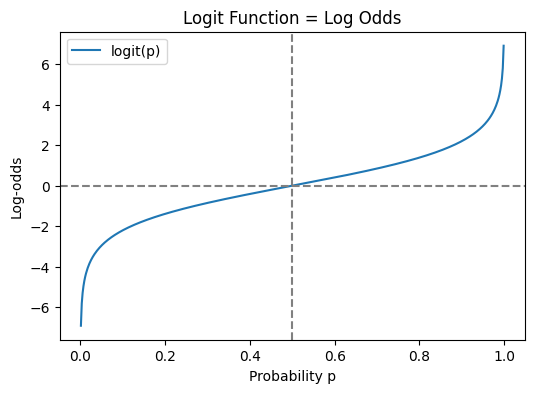

In [45]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0.001, 0.999, 500)
logit = np.log(p/(1-p))

plt.figure(figsize=(6,4))
plt.plot(p, logit, label="logit(p)")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0.5, color="gray", linestyle="--")
plt.xlabel("Probability p")
plt.ylabel("Log-odds")
plt.title("Logit Function = Log Odds")
plt.legend()
plt.show()

### Log Odds Ratios
To compare two groups (say, John vs. Mary), we compute the difference in their log odds for a word:

$$
\text{Log Odds Ratio} = 
\log \left( \frac{p_1}{1-p_1} \right) - 
\log \left( \frac{p_2}{1-p_2} \right)
$$

- Positive → word is more associated with group 1.
- Negative → word is more associated with group 2.

In [47]:
# Example: word 'banana'
# John: 7 out of 12 words
# Mary: 1 out of 16 words

p1 = 7/12
p2 = 1/16

log_odds_ratio = np.log(p1/(1-p1)) - np.log(p2/(1-p2))
log_odds_ratio

np.float64(3.044522437723423)